In [2]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

In [14]:
from sklearn import tree

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
X=df.drop(["Outcome"],1)

/tmp/ipykernel_26192/1134654254.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop(["Outcome"],1)


In [8]:
y=df.Outcome

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
y_test.value_counts()

0    146
1     85
Name: Outcome, dtype: int64

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn

In [22]:
bgg=BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=0)

In [23]:
bgg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [24]:
bgg.score(X_test,y_test)

0.7835497835497836

In [25]:
y_pred=bgg.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [33]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, recall_score, precision_score,classification_report

<AxesSubplot:>

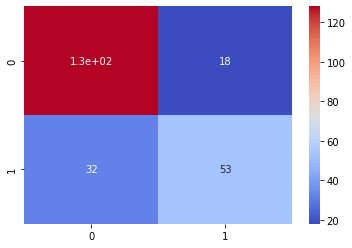

In [39]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap='coolwarm')

In [40]:
s=classification_report(y_test,y_pred)

In [41]:
print(s)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [42]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[128,  18],
       [ 32,  53]])

In [44]:
from sklearn.model_selection import cross_val_score

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=cross_val_score(RandomForestClassifier(n_estimators=50),X,y,cv=5)

In [58]:
rf.mean()

0.7487479840421016

In [50]:
rf.score(X_test,y_test)

0.8008658008658008

In [ ]:
RandomForestClassifier

In [59]:
pip install XGBoost

     |████████████████████████████████| 192.9 MB 32 kB/s  eta 0:00:01    |████████████▉                   | 77.3 MB 5.5 MB/s eta 0:00:22     |████████████████                | 96.5 MB 5.1 MB/s eta 0:00:20     |██████████████████▏             | 109.3 MB 4.0 MB/s eta 0:00:22
Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
from xgboost import XGBClassifier

In [62]:
xgb=XGBClassifier(random_state=1)

In [64]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
xgb.score(X_test,y_test)

0.7705627705627706

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [68]:
import pickle

In [69]:
filename='XGBClassifier.pickle'

In [70]:
pickle.dump(xgb,open(filename,'wb'))

In [71]:
loaded_model=pickle.load(open(filename,'rb'))